# Анализ продаж игр для интернет-магазина "Стримчик"

*Анализ от 15.12.2016*

## Описание проект

**Цель исследования:** Выявить определяющие успешность игры закономерности и предложить рекомендации для рекламной кампании.

**Данные:** Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные до 2016 года.

**Инструменты:** *диаграмма размаха* для анализа разброса продаж у каждой платформы, *коэффициент корреляции* для анализа зависимости продаж от отзывов пользователей или критиков, *проверка гипотез о равенстве среднего двух генеральных совокупностей* с помощью двустороннего t-тест Стьюдента

## Описание данных
Датасет **games.csv** содержит колонки:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Содержание
1. [Общая информация](#info)
2. [Предобработка данных](#preprocessing)
3. [Исследовательский анализ данных](#analysis)
    * 3.1. [Сколько игр выпускалось в разные годы](#years)
    * 3.2. [Как менялись продажи по платформам](#platforms)
    * 3.3. [Подбор актуального периода](#act_data)
    * 3.4. [Платформы с 2012 года](#act_platform)
    * 3.5. [Глобальные продажи игр в разбивке по платформам](#act_platform_boxplot)
    * 3.6. [Распределение игр по жанрам](#genres)
4. [Портрет пользователя каждого региона](#regions)
    * 4.1. [Топ-5 самых популярных платформ](#regions_platforms)
        * 4.1.1. [Северная Америка](#na_platforms)
        * 4.1.2. [Европа](#eu_platforms)
        * 4.1.3. [Япония](#jp_platforms)
        * 4.1.4. [Сравнение регионов по платформам](#all_platforms)
    * 4.2 [Топ-5 самых популярных жанров](#regions_genres)
        * 4.2.1. [Северная Америка](#na_genres)
        * 4.2.2. [Европа](#eu_genres)
        * 4.2.3. [Япония](#jp_genres)
        * 4.2.4. [Сравнение регионов по жанрам](#all_genres)
    * 4.3 [Влияние рейтинга ESRB](#ESRB)
5. [Проверка гипотез](#hypotheses)
    * 5.1 [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#hypotheses1)
    * 5.2 [Средние пользовательские рейтинги жанров Action и Sports одинаковые](#hypotheses2)
6. [Выводы](#conclusion)

# 1. Общая информация <a class="anchor" id="info"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# 2. Предобработка данных <a class="anchor" id="preprocessing"></a>

## 2.1 Названия столбцов

In [4]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

## 2.2 Пропуски

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
#удаляем строки в 'name', 'genre', 'year_of_release'
data = data.dropna(subset =['name', 'genre', 'year_of_release']).reset_index(drop=True)

**Удалили строки с пропусками в *name, genre, year_of_release*, так как их заменить не получится, и их незначительное количество на общую оценку не повлияют.**

In [7]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

*Справка:*

* «E» («Everyone») — «Для всех». Первоначально "K-A" ("Kids to Adults")
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет
* «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
* «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Так как это категоральные значения, то пропуски можно заменить на no_ESRP, и «E» объединить с "K-A"

In [8]:
#объединяем E & K-A
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

#заменяем пропуски в rating
data.loc[data['rating'].isna(), 'rating'] = 'no_ESRP'

**Значения в *rating* - категориальные переменные. Пропуски заменили на значение "no_ESRP", объединили название устаревшего рейтинга с настоящим.**

In [9]:
#проверка
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

**Пропуски в *scores* нельзя заменять, так как это исказит анализ.**

## 2.3 Тип данных

In [10]:
#data['user_score'] = data['user_score'].astype('float64')

В столбце *user_score* присутствует аббривиатура tbd, что означает To Be Determined (будет определено). Используется, если какая-то информация еще не определена, следовательно, надо заполнить это значение как пропуск NaN

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('NaN')

In [12]:
# изменим типы данных
data['year_of_release'] = data['year_of_release'].astype('int64')

data['user_score'] = data['user_score'].astype('float64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## 2.4 Дубликаты

In [13]:
#проверим наличие дубликатов
data.duplicated().sum()

0

**Дупликатов нет**

## 2.5 Новый столбец `total_sales` - суммарные продажи

In [14]:
# новый столбец, в котором будут содержатся данные продаж во всех регионах
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_ESRP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_ESRP,31.38


## 2.6 Вывод

* Названия столбцов приведены к нижнему регистру, добавлен новый столбец с суммарными продажами. 
* Пропуски остались в *critic_score* и *user_score*, так как заполнение их медианой или средним значением по группировке суммарных продаж исказит анализ. 
* Дупликаты не выявлены.

In [15]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

# 3. Исследовательский анализ данных <a class="anchor" id="analysis"></a>

## 3.1 Сколько игр выпускалось в разные годы <a class="anchor" id="years"></a>

In [16]:
#посмотрим, в какие года больше всего выпускалось игр
release = data.groupby('year_of_release').agg({'name': 'count'})
display(release.head(10).sort_values(by='name', ascending=False))

,name
year_of_release,
1981,46
1982,36
1986,21
1983,17
1989,17
1987,16
1988,15
1984,14
1985,14


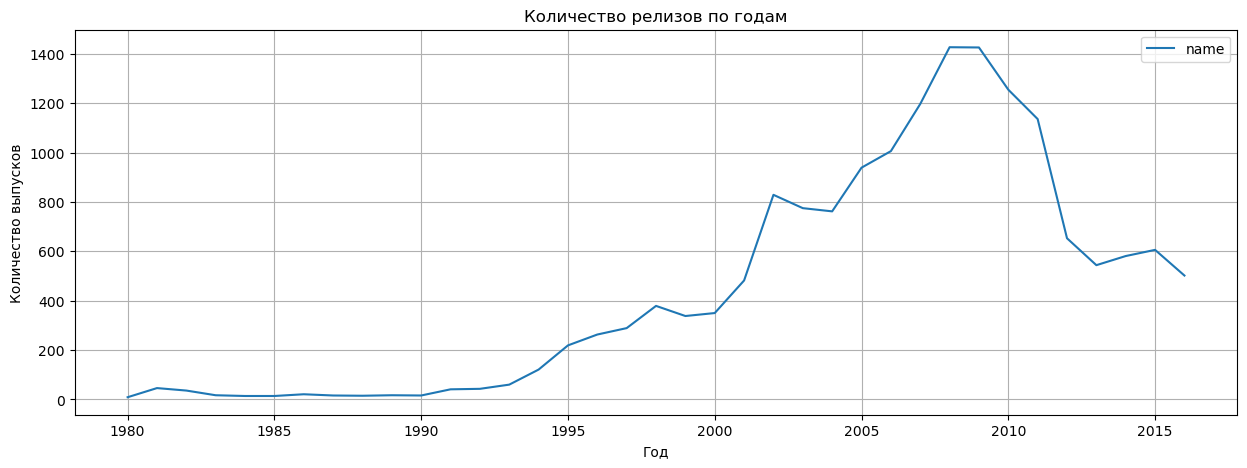

In [17]:
release.plot(grid = True, figsize=(15,5))
plt.title('Количество релизов по годам')
plt.xlabel('Год')
plt.ylabel('Количество выпусков')
plt.show()

**До 1992 - малая активность. С 1992 по 2005 идет постепенное увеличение выпусков игр. Период с 2005 по 2011 является лучшим по выпуску игр. С 2011 наблюдается спад.**

## 3.2 Как менялись продажи по платформам <a class="anchor" id="platforms"></a>

Выберем лучшие платформы в зависимости от продаж за все годы:

In [18]:
len(data['platform'].unique())

31

In [67]:
top15_platforms = data.groupby('platform') \
    .agg({'total_sales':'sum'}) \
    .sort_values(by='total_sales', ascending=False) \
    .reset_index() \
    .head(15)
top15_platforms['part,%'] = round(top15_platforms['total_sales'] / top15_platforms['total_sales'].sum() * 100, 2)
top15_platforms

,platform,total_sales,"part,%"
0,PS2,1233.56,15.51
1,X360,961.24,12.09
2,PS3,931.34,11.71
3,Wii,891.18,11.21
4,DS,802.78,10.09
5,PS,727.58,9.15
6,PS4,314.14,3.95
7,GBA,312.88,3.93
8,PSP,289.53,3.64
9,3DS,257.81,3.24


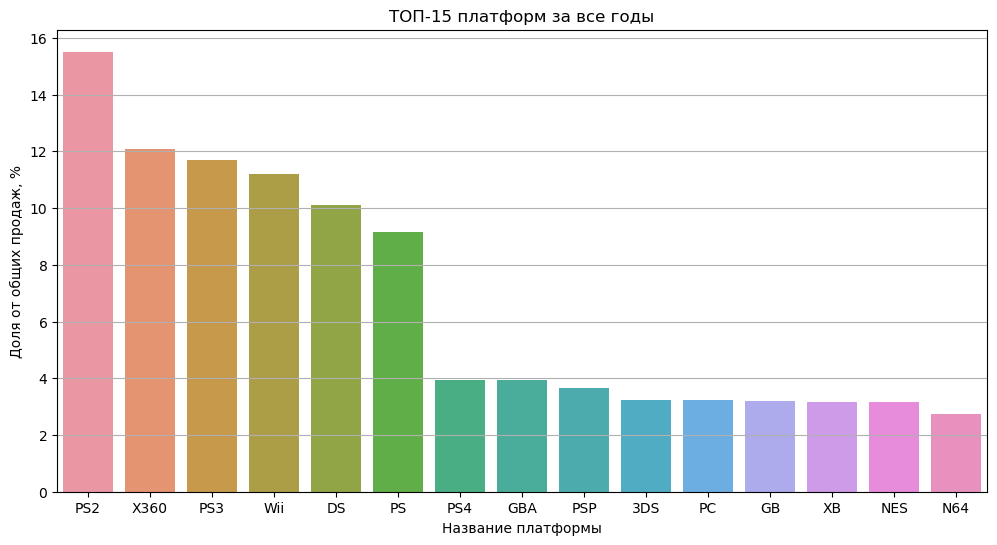

In [20]:
plt.figure(figsize=(12,6))
plt.grid()

sns.barplot(y='part', x='platform', data = top15_platforms);
plt.xlabel('Название платформы')
plt.ylabel('Доля от общих продаж, %')
plt.title('ТОП-15 платформ за все годы')
plt.show()

Text(0, 0.5, 'Объём продаж за год')

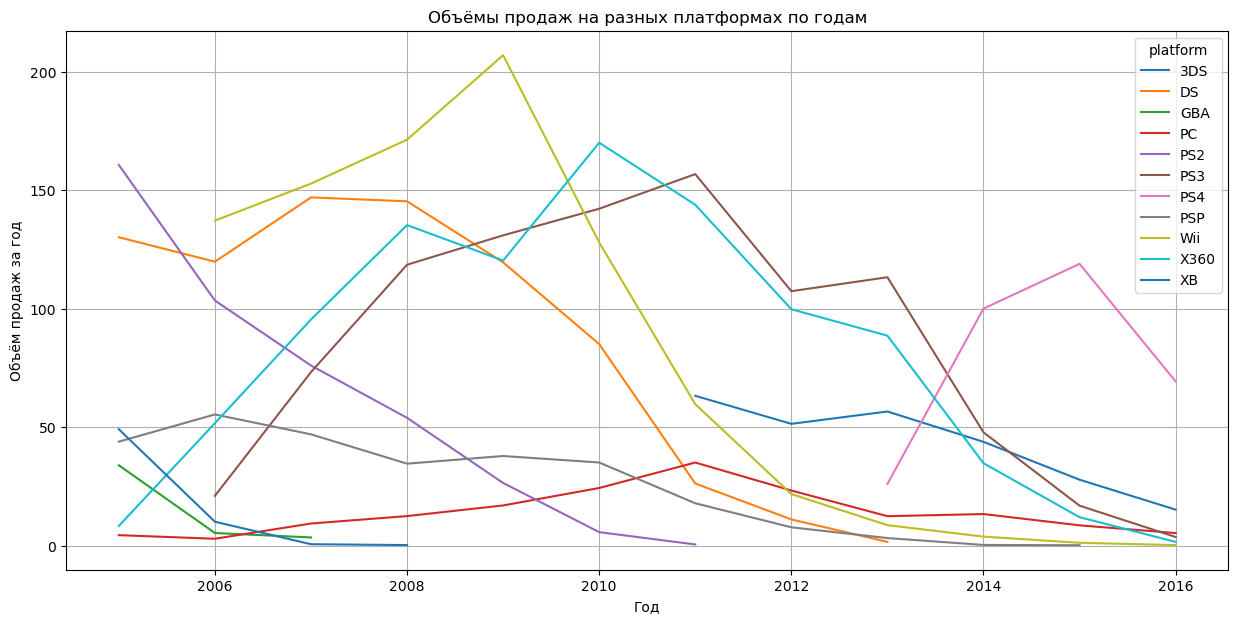

In [21]:
#список из топ-15 платформ
top15_platforms_list = top15_platforms['platform'].to_list()

#визуализируем их во времени
data.query('platform in @top15_platforms_list and year_of_release>=2005').pivot_table(index='year_of_release', 
                                                                                      columns='platform', 
                                                                                      values='total_sales', 
                                                                                      aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.title('Объёмы продаж на разных платформах по годам')
plt.xlabel('Год')    
plt.ylabel('Объём продаж за год')

**У каждой платформы есть свой пик популярности и спад. Найдем среднюю "жизнь" платформ.**

## 3.3 Подбор актуального периода <a class="anchor" id="act_data"></a>

In [22]:
# сгруппируем данные по платформе и году выпуска и зададим порог продаж в 1 млн
act_data1 = data.query('total_sales>=1').groupby(['platform', 'year_of_release']).count()
act_data1

name  genre  na_sales  eu_sales  jp_sales  \
platform year_of_release                                              
2600     1980                4      4         4         4         4   
         1981               11     11        11        11        11   
         1982                7      7         7         7         7   
         1983                1      1         1         1         1   
3DS      2011               10     10        10        10        10   
...                        ...    ...       ...       ...       ...   
XB       2006                1      1         1         1         1   
XOne     2013                8      8         8         8         8   
         2014               15     15        15        15        15   
         2015               19     19        19        19        19   
         2016                9      9         9         9         9   

                          other_sales  critic_score  user_score  rating  \
platform year_of_release                                                  
2600     1980                       4             0           0       4   
         1981                      11             0           0      11   
         1982                       7             0           0       7   
         1983                       1             0           0       1   
3DS      2011                      10             6           6      10   
...                               ...           ...         ...     ...   
XB       2006                       1             1           1       1   
XOne     2013                       8             6           8       8   
         2014                      15            14          14      15   
         2015                      19            17          17      19   
         2016                       9             9           9       9   

                          total_sales  
platform year_of_release               
2600     1980                       4  
         1981                      11  
         1982                       7  
         1983                       1  
3DS      2011                      10  
...                               ...  
XB       2006                       1  
XOne     2013                       8  
         2014                      15  
         2015                      19  
         2016                       9  

[179 rows x 10 columns]

In [23]:
# посмотрим общее количество продаж у определенных платформ
act_data2 = act_data1.groupby('platform')['total_sales'].count()
act_data2

platform
2600     4
3DS      6
DC       3
DS       9
GB      13
GBA      7
GC       6
GEN      4
N64      5
NES     11
PC      22
PS      10
PS2     10
PS3     10
PS4      4
PSP      7
PSV      3
SAT      2
SCD      1
SNES     7
Wii      9
WiiU     5
X360    11
XB       6
XOne     4
Name: total_sales, dtype: int64

In [24]:
avg_act_data2 = act_data2.mean()
print(f'Среднее время жизни платформы: {avg_act_data2}')

Среднее время жизни платформы: 7.16


**Актуальный период составит 4 года (половина от средней продолжительности существования платформы, так как сначала платформа половину времени растет, затем падает). Следовательно, возьмем период с 2012 года.**

In [25]:
data2012 = data.query('year_of_release>=2012')

## 3.4 Платформы с 2012 года <a class="anchor" id="act_platform"></a>

Отберем платформы с 2012, которые имели больше всех объем по продажам.

In [26]:
top10_platforms_since2012 = data2012.groupby('platform') \
    .agg({'total_sales':'sum'}) \
    .sort_values(by='total_sales', ascending=False) \
    .reset_index() \
    .head(10)
top10_platforms_since2012

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


Text(0, 0.5, 'Объем продаж')

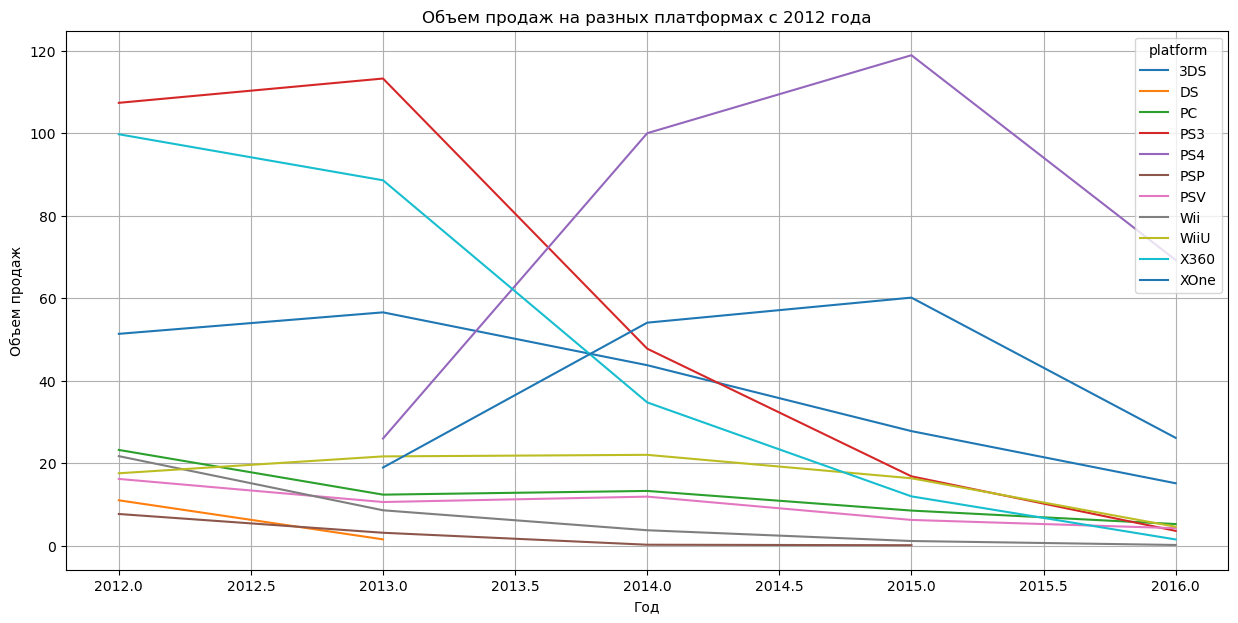

In [27]:
platforms_since2012 = data2012.pivot_table(index='year_of_release', 
                                           columns='platform', 
                                           values='total_sales', 
                                           aggfunc='sum')
platforms_since2012.plot(grid=True, figsize=(15, 7))
plt.title('Объем продаж на разных платформах с 2012 года')
plt.xlabel('Год')
plt.ylabel('Объем продаж')

Возьмем 7 самых продаваемых платформ 

In [28]:
top7 = top10_platforms_since2012.head(7)
top7

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65


**С 2012 года самыми популярными платформами являются: PS4, PS3, X360, 3DS, XOne, WiiU, PC.**

## 3.5 Глобальные продажи игр в разбивке по платформам <a class="anchor" id="act_platform_boxplot"></a>

In [29]:
#создадим список из платформ, существующих с 2012
platforms_since2012_new = data2012.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales')

platforms_since2012_list = list(platforms_since2012_new['platform'])

Text(0.5, 1.0, 'Диаграмма размаха для платформ, существующих с 2012')

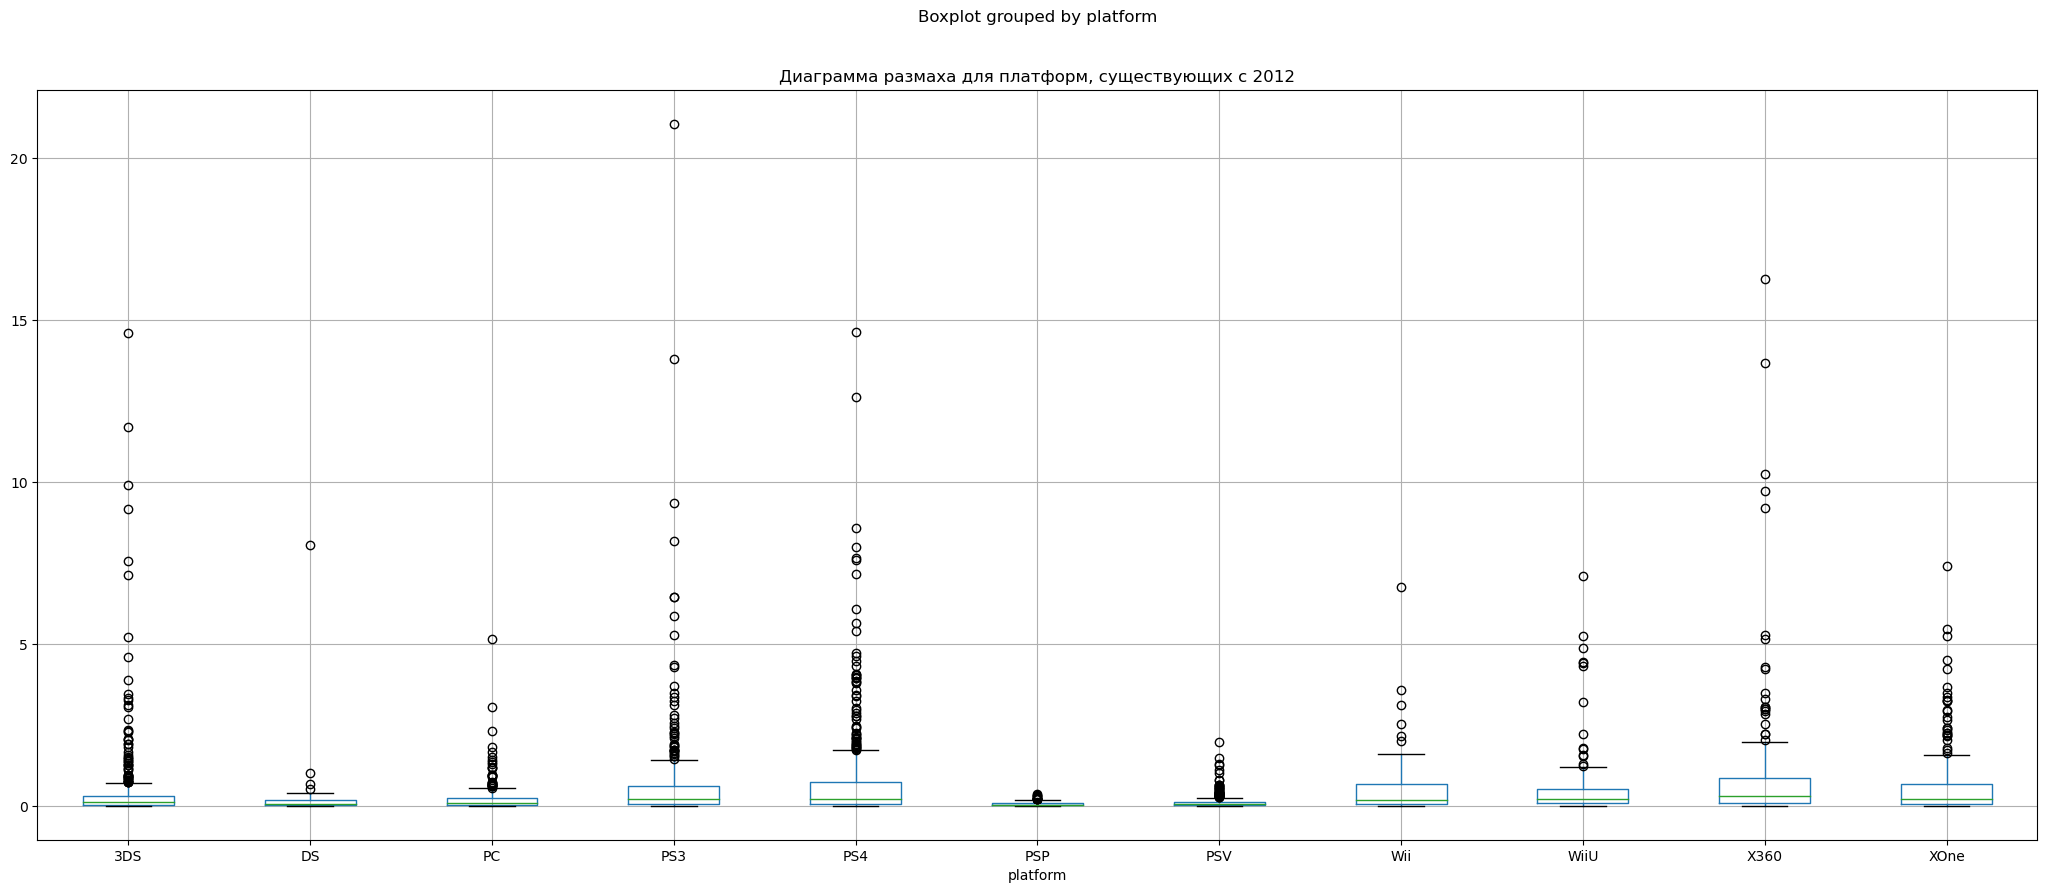

In [30]:
# построим диаграмму размаха платформ с 2012
data2012.query('platform == @platforms_since2012_list') \
    .boxplot('total_sales', by='platform', figsize=(25,10))
plt.title('Диаграмма размаха для платформ, существующих с 2012')

Text(0.5, 1.0, 'Диаграмма размаха для платформ, существующих с 2012')

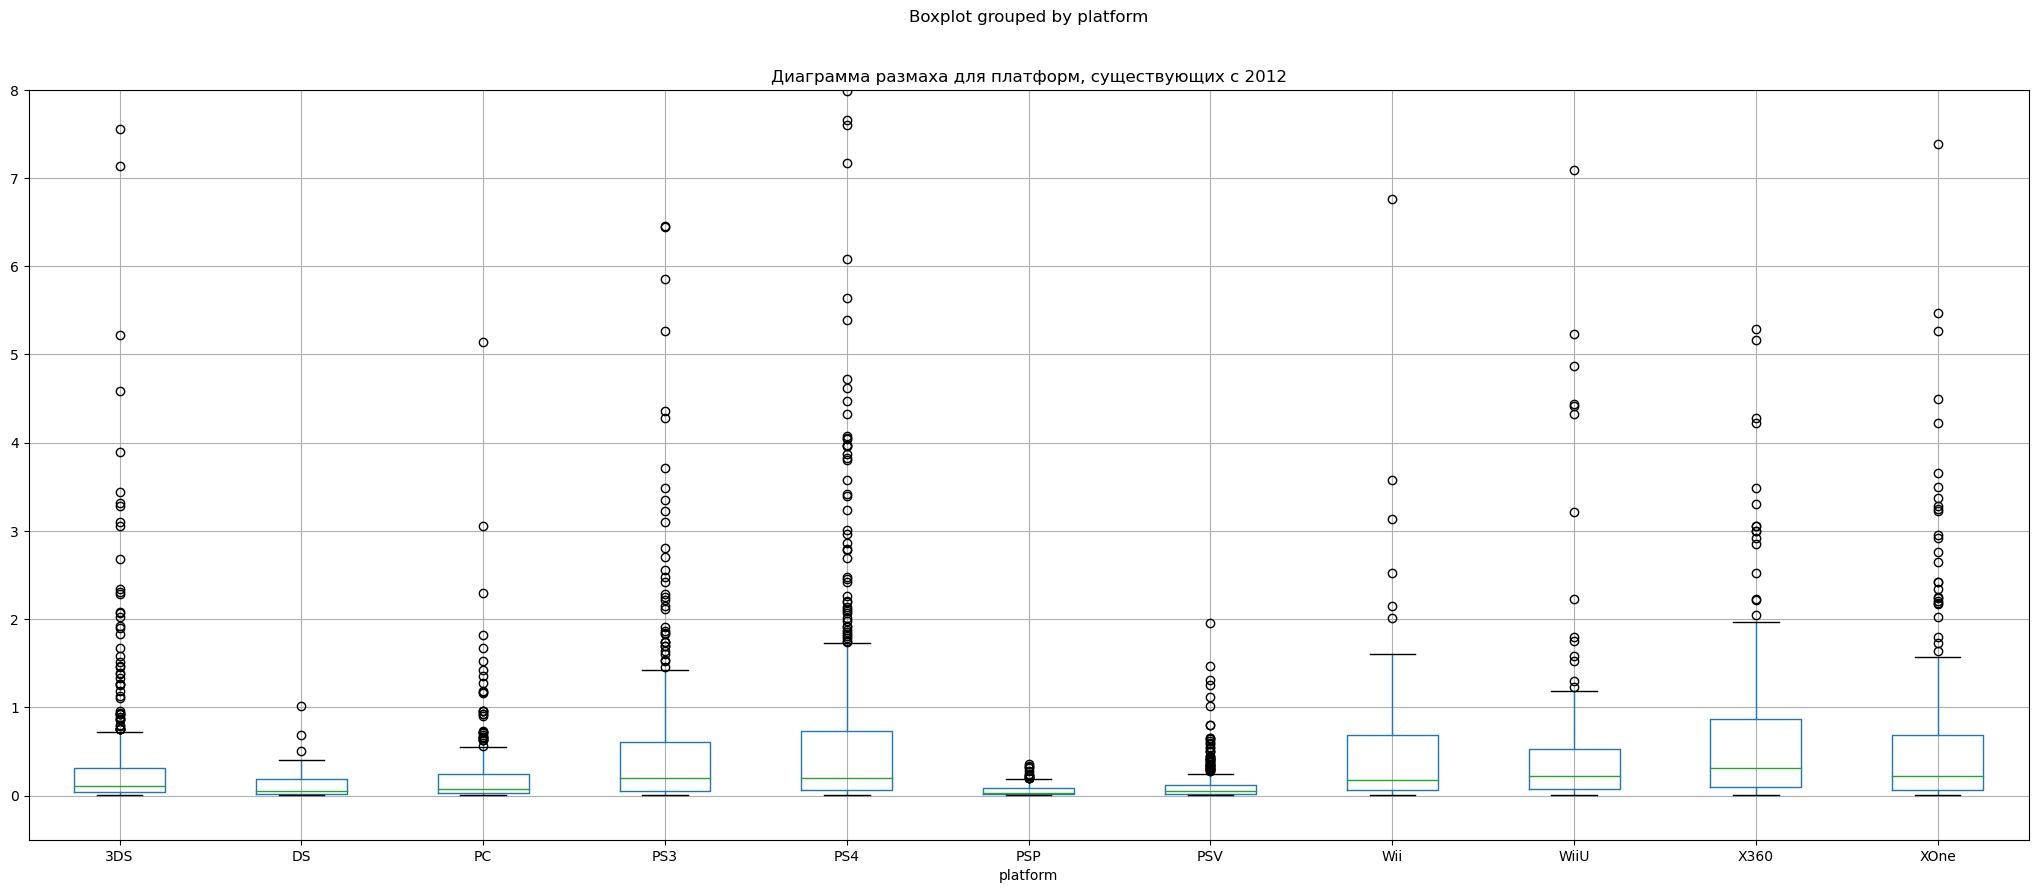

In [31]:
#сократим масштаб, чтобы посмотреть поближе
data2012.query('platform == @platforms_since2012_list') \
    .boxplot('total_sales', by='platform', figsize=(25,10))
plt.ylim(-0.5,8)
plt.title('Диаграмма размаха для платформ, существующих с 2012')

**Медианные значения продаж на разных платформах схожи. Правый ус у платформ PS3, PS4, Wii, X360, XOne очень длинный, что говорит о больших разбросах в значениях. У платформ PSP, PSV, DS, PC правый ус короче - малый разброс данных.**

### 3.5.1 Продажи внутри платформы PS4 и отзывы за платформу

In [32]:
platform_PS4 = data2012.query('platform == "PS4"')[['critic_score', 'user_score', 'total_sales']] \
    .dropna().reset_index(drop=True)
platform_PS4

,critic_score,user_score,total_sales
0,97.0,8.3,12.62
1,82.0,4.3,8.58
2,83.0,5.7,7.66
3,85.0,5.0,7.60
4,87.0,6.5,7.17
...,...,...,...
244,42.0,2.3,0.01
245,70.0,6.8,0.01
246,69.0,7.5,0.01
247,61.0,7.9,0.01


In [33]:
platform_PS4.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


Коэффициент зависимости продаж от отзывов критиков = 0.4058948014583661


Text(0.5, 1.0, 'Зависимость продаж от отзывов критиков')

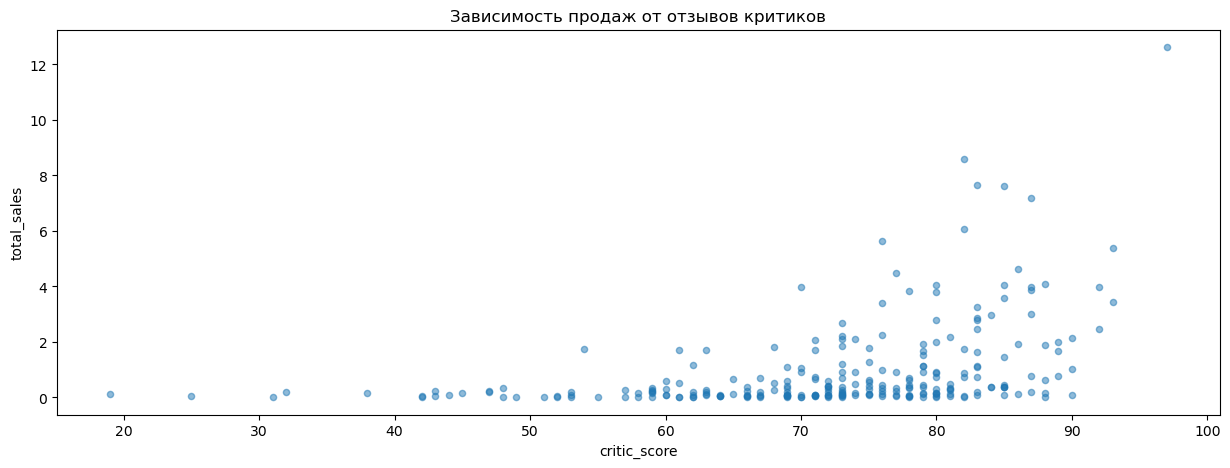

In [34]:
print('Коэффициент зависимости продаж от отзывов критиков =', platform_PS4['total_sales'].corr(platform_PS4['critic_score']))
platform_PS4.plot(x='critic_score', 
                  y='total_sales', 
                  kind='scatter', 
                  figsize=(15,5), 
                  alpha=0.5)
plt.title('Зависимость продаж от отзывов критиков')

Коэффициент зависимости продаж от отзывов пользователей = -0.03362497596528882


Text(0.5, 1.0, 'Зависимость продаж от отзывов пользователей')

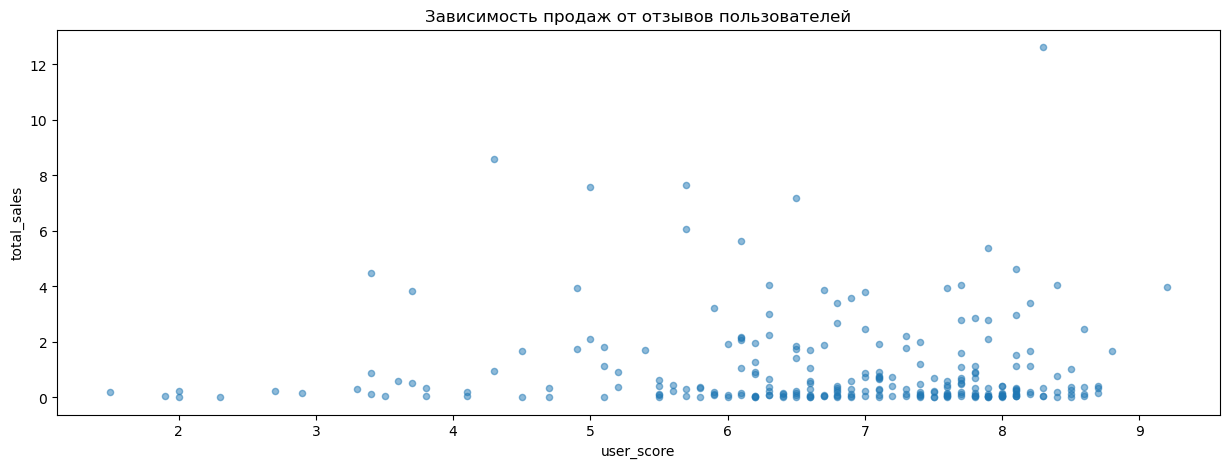

In [35]:
print('Коэффициент зависимости продаж от отзывов пользователей =', platform_PS4['total_sales'].corr(platform_PS4['user_score']))
platform_PS4.plot(x='user_score', 
                  y='total_sales', 
                  kind='scatter', 
                  figsize=(15,5), 
                  alpha=0.5)
plt.title('Зависимость продаж от отзывов пользователей')

In [36]:
PS4_scores = data2012.query('platform == "PS4"').pivot_table(index='year_of_release', 
                                                             values='user_score', 
                                                             aggfunc='median')
PS4_scores

,user_score
year_of_release,
2013,6.20
2014,6.95
2015,7.10
2016,7.30


И правда, продажи у платформы PS4 падают с 2015, если посмотреть на график выше, одни пользователи за 2016 поставили отзыв выше, по сравнению с 2015 годом.

**Зависимость продаж от отзывов критиков прямопропорциональна (коэффициент 0,41 - зависимость слабая), т.е. чем выше оценка, тем выше продажи. Что не скажешь о зависимости продаж от оценки пользователей - обратная зависимость (коэффициент - -0,03).**

### 3.5.2 Корреляция между отзывами критиков и продажами для `top7` платформ

Корреляция между отзывами критиков и продажами PS4: 0.41


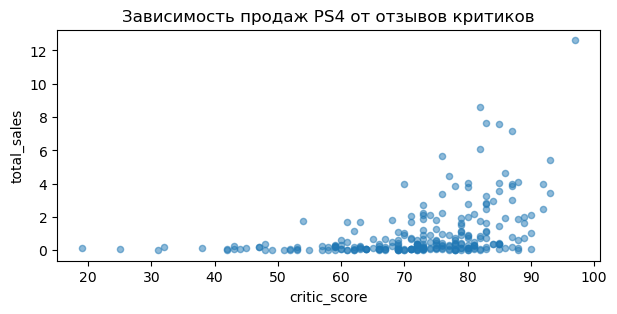

Корреляция между отзывами критиков и продажами PS3: 0.33


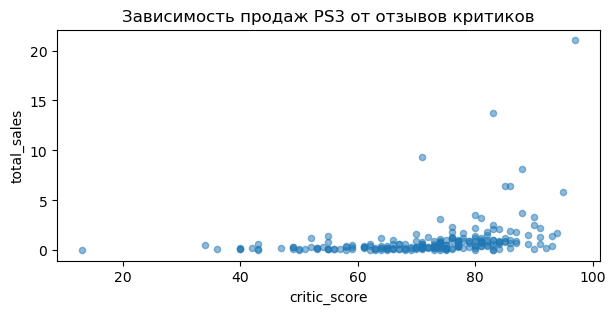

Корреляция между отзывами критиков и продажами X360: 0.36


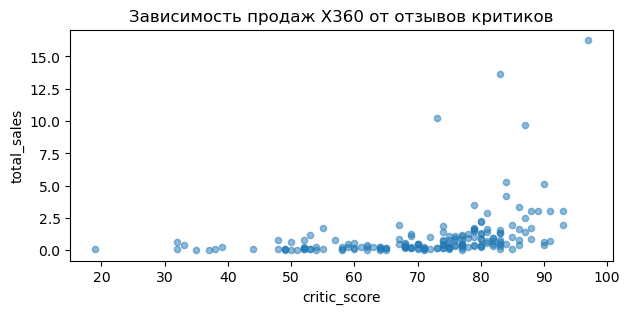

Корреляция между отзывами критиков и продажами 3DS: 0.32


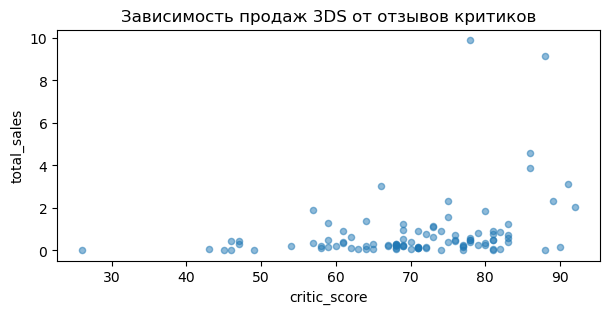

Корреляция между отзывами критиков и продажами XOne: 0.42


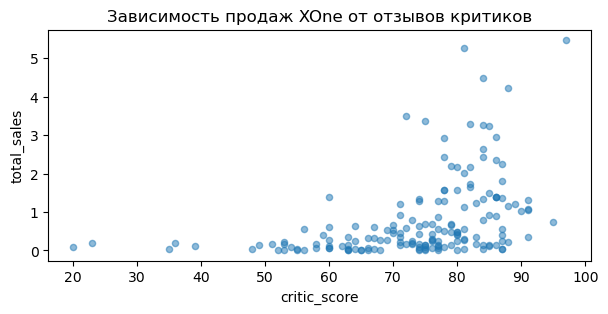

Корреляция между отзывами критиков и продажами WiiU: 0.35


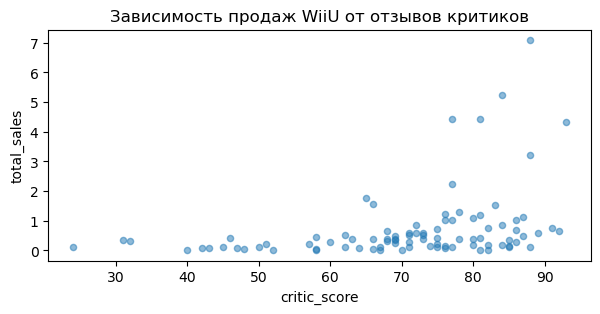

Корреляция между отзывами критиков и продажами PC: 0.24


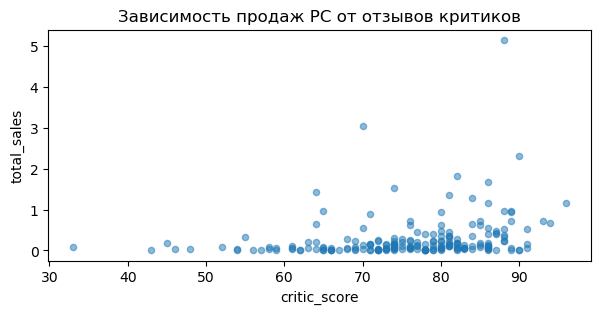

In [37]:
# напишем корреляцию между отзывами критиков и продажами для всех топ-7 платформ с 2012 и визуализируем ее в диаграмме рассеяния
for pl in top7['platform']:
    cor = data2012.loc[data['platform'] == pl]['critic_score'].corr(data2012.loc[data['platform'] == pl]['total_sales'])
    cor = cor.round(2)
    print(f'Корреляция между отзывами критиков и продажами {pl}: {cor}')
    platform_X = data2012.loc[data['platform'] == pl][['critic_score', 'user_score', 'total_sales']].dropna().reset_index(drop=True)
    platform_X.plot(x='critic_score', 
                  y='total_sales', 
                  kind='scatter', 
                  figsize=(7,3), 
                  alpha=0.5)
    plt.title(f'Зависимость продаж {pl} от отзывов критиков')
    plt.show()

### 3.5.3 Корреляция между отзывами пользователей и продажами для `top7` платформ

Корреляция между оценками пользователей и продажами PS4: -0.03


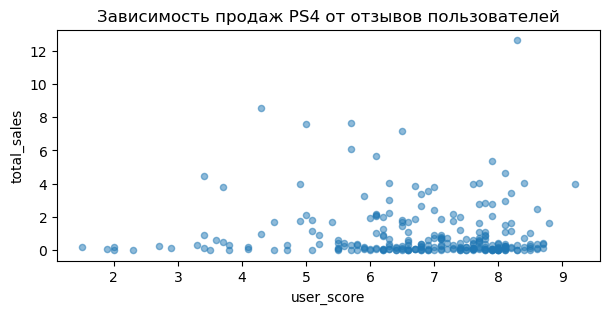

Корреляция между оценками пользователей и продажами PS3: -0.01


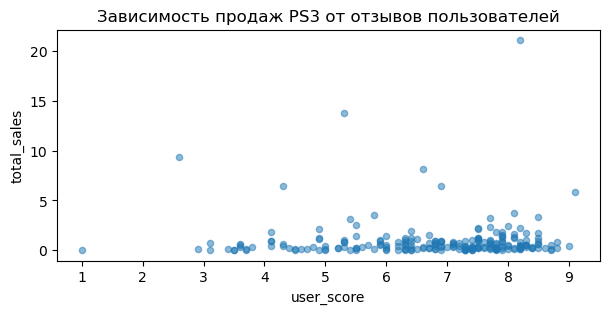

Корреляция между оценками пользователей и продажами X360: 0.01


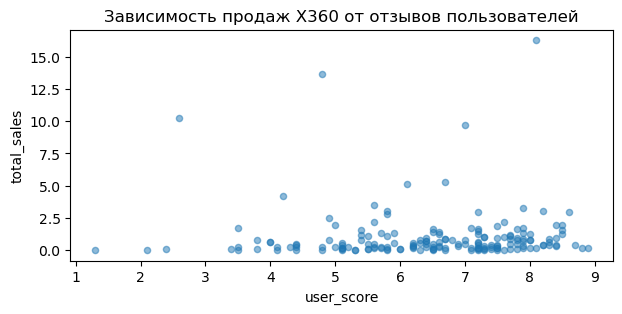

Корреляция между оценками пользователей и продажами 3DS: 0.2


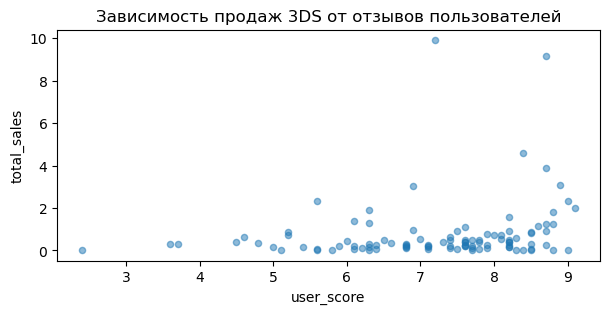

Корреляция между оценками пользователей и продажами XOne: -0.07


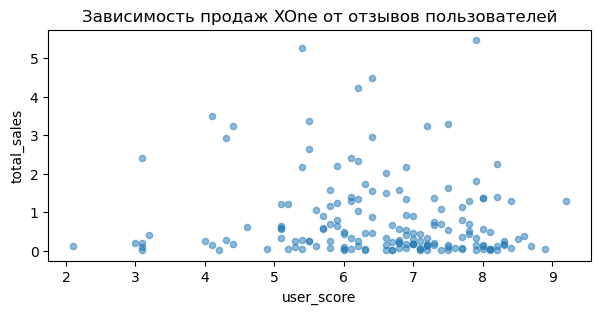

Корреляция между оценками пользователей и продажами WiiU: 0.4


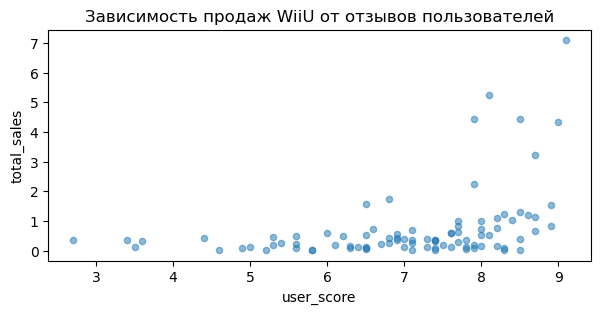

Корреляция между оценками пользователей и продажами PC: -0.12


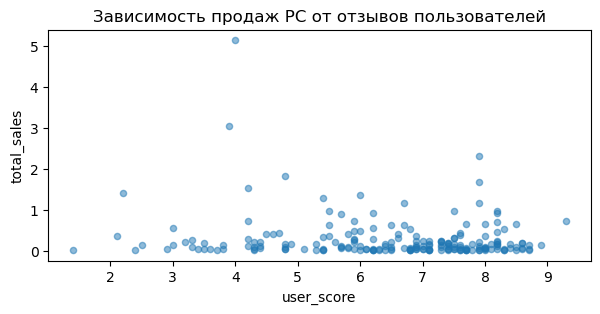

In [38]:
# напишем корреляцию между отзывами критиков и продажами для всех топ-7 платформ с 2012 и визуализируем ее в диаграмме рассеяния
for pl in top7['platform']:
    cor = data2012.loc[data['platform'] == pl]['user_score'].corr(data2012.loc[data['platform'] == pl]['total_sales'])
    cor = cor.round(2)
    print(f'Корреляция между оценками пользователей и продажами {pl}: {cor}')
    platform_X = data2012.loc[data['platform'] == pl][['critic_score', 'user_score', 'total_sales']].dropna().reset_index(drop=True)
    platform_X.plot(x='user_score', 
                  y='total_sales', 
                  kind='scatter', 
                  figsize=(7,3), 
                  alpha=0.5)
    plt.title(f'Зависимость продаж {pl} от отзывов пользователей')
    plt.show()

**Схожая тенденция проявляется для всех платформ. Отзывы критиков и продажи имеют прямо пропорциональную зависимость (средняя зависимость, корреляция колеблется от 0.24 до 0.41). Однако зависимость между отзывами пользователей и продажами слабая, иногда и обратно пропорциональная. Следовательно, *пользователи в основном не влияют на продажи*.**

## 3.6 Распределение игр по жанрам <a class="anchor" id="genres"></a>

In [39]:
# количество игр по жанрам
genres = data2012.groupby('genre').agg({'total_sales': 'count'}) \
    .sort_values(by='total_sales', ascending=False)
display(genres)

,total_sales
genre,
Action,1031
Role-Playing,370
Adventure,302
Sports,268
Shooter,235
Misc,192
Racing,115
Fighting,109
Platform,85


In [40]:
# сумма продаж по жанрам
genre_sales = data2012.groupby('genre').agg({'total_sales': 'sum'}) \
    .sort_values(by='total_sales',ascending=False)
display(genre_sales)

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


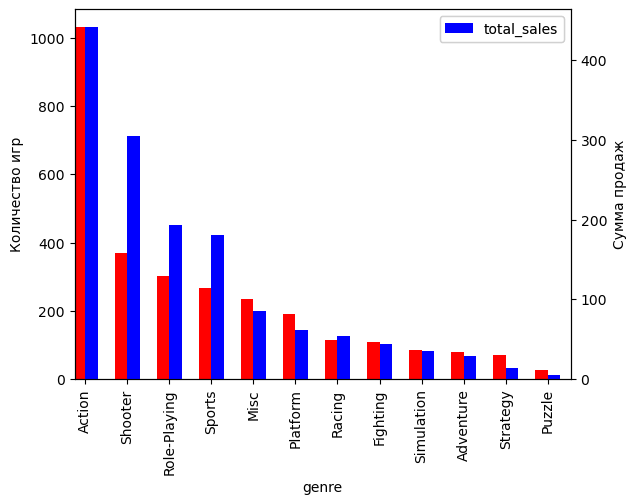

In [41]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.3

genres.plot(kind='bar', color='red', ax=ax, width=width, position=1, label = 'line1')

genre_sales.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label = 'line2')

ax.set_ylabel('Количество игр')
ax2.set_ylabel('Сумма продаж')


plt.show()

С большим отрывом выпускались игры с жанром *Action*. Далее *Shooter, Role-Playing, Sports*. Наименее продаваемые игры с жанром *Puzzle*. На данный анализ влияет тип платформы. Посмотрим на стабильность жанров, которые приносят доход независимо от платформы. Для этого создадим ящик с усами по платформам.

Text(0.5, 1.0, 'Диаграмма размаха по жанрам')

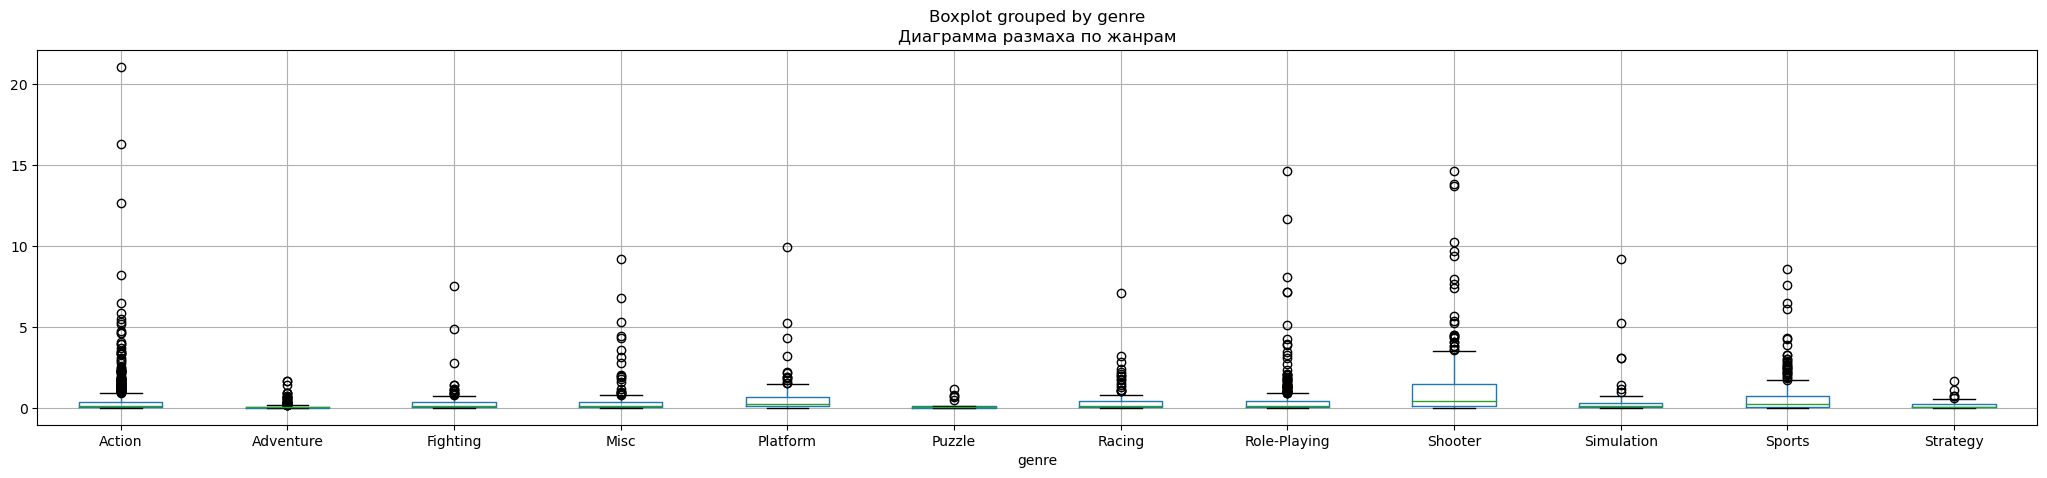

In [42]:
data2012.boxplot('total_sales', by='genre', figsize=(25,5))
plt.title('Диаграмма размаха по жанрам')

Наблюдаем большое количество разбросов данных у жанров *Action, Role-Playing, Shooter*.

Text(0.5, 1.0, 'Диаграмма размаха по жанрам')

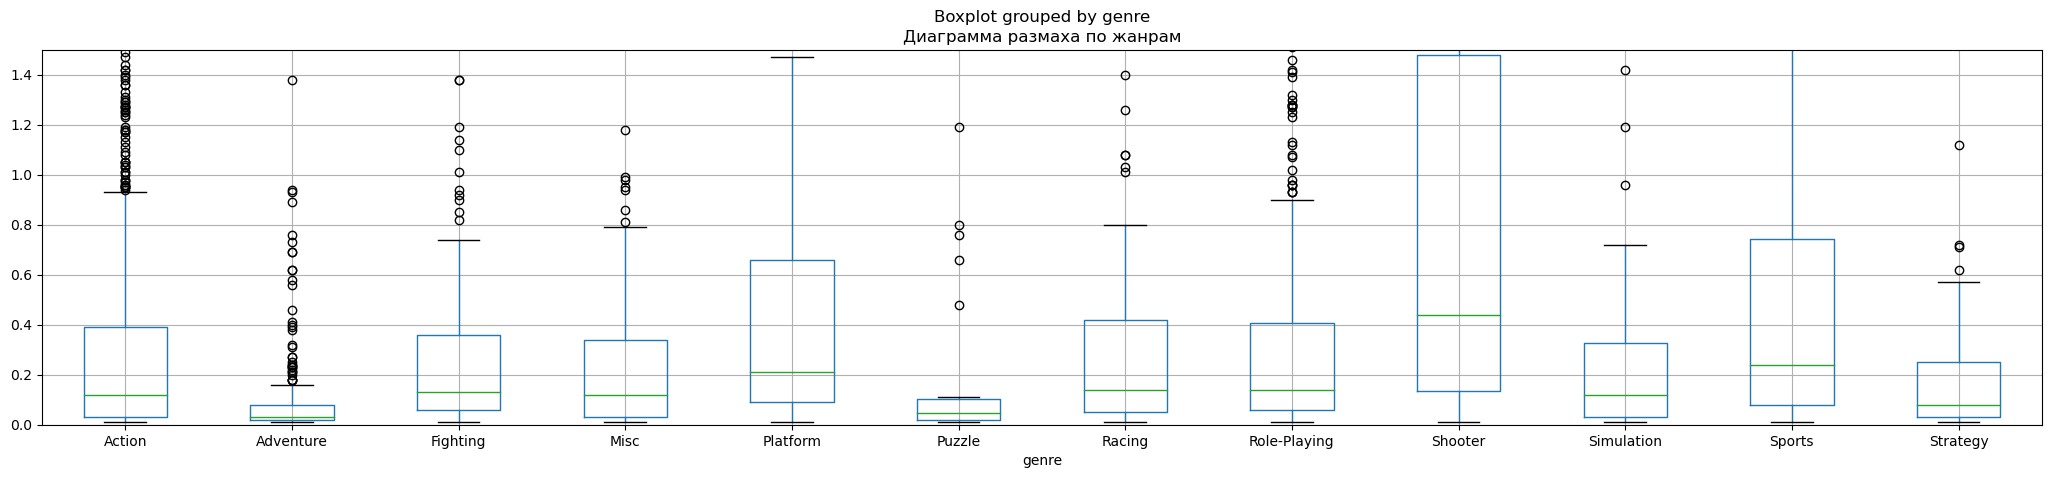

In [43]:
# уменьшим масштаб
data2012.boxplot('total_sales', by='genre', figsize=(25,5))
plt.ylim(0,1.5)
plt.title('Диаграмма размаха по жанрам')

**Наибольшую прибыль с точки зрения стабильности приносят платформы: *Sports, Platform*. И несмотря на высокий разброс значений у жанра *Shooter*, этот жанр так же приносит стабильный доход.**

# 4. Портрет пользователя каждого региона <a class="anchor" id="regions"></a>

## 4.1 Топ-5 самых популярных платформ <a class="anchor" id="regions_platforms"></a>

### 4.1.1 Северная Америка  <a class="anchor" id="na_platforms"></a>

In [44]:
top5_platforms_na = data2012 \
        .groupby('platform')['na_sales'].sum() \
        .sort_values(ascending=False).reset_index()
top5_platforms_na.head()

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


In [45]:
# объединяем платформы не из ТОП-5
top5_platforms_na.loc[(top5_platforms_na['platform'] != 'X360') \
                                                   & (top5_platforms_na['platform'] != 'PS4') \
                                                   & (top5_platforms_na['platform'] != 'PS3') \
                                                   & (top5_platforms_na['platform'] != 'XOne') \
                                                   & (top5_platforms_na['platform'] != '3DS'), 'platform'] = 'other'
top5_platforms_na = top5_platforms_na.reset_index().groupby('platform')['na_sales'].sum().reset_index()
top5_platforms_na

,platform,na_sales
0,3DS,55.31
1,PS3,103.38
2,PS4,108.74
3,X360,140.05
4,XOne,93.12
5,other,90.37


### 4.1.2 Европа  <a class="anchor" id="eu_platforms"></a>

In [46]:
top5_platforms_eu = data2012 \
        .groupby('platform')['eu_sales'].sum() \
        .sort_values(ascending=False).reset_index()
top5_platforms_eu.head()

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


In [47]:
# объединяем платформы не из ТОП-5
top5_platforms_eu.loc[(top5_platforms_eu['platform'] != 'PS4') \
                                                   & (top5_platforms_eu['platform'] != 'PS3') \
                                                   & (top5_platforms_eu['platform'] != 'X360') \
                                                   & (top5_platforms_eu['platform'] != 'XOne') \
                                                   & (top5_platforms_eu['platform'] != '3DS'), 'platform'] = 'other'
top5_platforms_eu = top5_platforms_eu.reset_index().groupby('platform')['eu_sales'].sum().reset_index()
top5_platforms_eu

,platform,eu_sales
0,3DS,42.64
1,PS3,106.86
2,PS4,141.09
3,X360,74.52
4,XOne,51.59
5,other,90.12


### 4.1.3 Япония  <a class="anchor" id="jp_platforms"></a>

In [48]:
top5_platforms_jp = data2012 \
        .groupby('platform')['jp_sales'].sum() \
        .sort_values(ascending=False).reset_index()
top5_platforms_jp.head()

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


In [49]:
# объединяем платформы не из ТОП-5
top5_platforms_jp.loc[(top5_platforms_jp['platform'] != '3DS') \
                                                   & (top5_platforms_jp['platform'] != 'PS3') \
                                                   & (top5_platforms_jp['platform'] != 'PSV') \
                                                   & (top5_platforms_jp['platform'] != 'PS4') \
                                                   & (top5_platforms_jp['platform'] != 'WiiU'), 'platform'] = 'other'
top5_platforms_jp = top5_platforms_jp.reset_index().groupby('platform')['jp_sales'].sum().reset_index()
top5_platforms_jp

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PS4,15.96
3,PSV,21.04
4,WiiU,13.01
5,other,19.49


### 4.1.4 Сравнение регионов по платформам   <a class="anchor" id="all_platforms"></a>

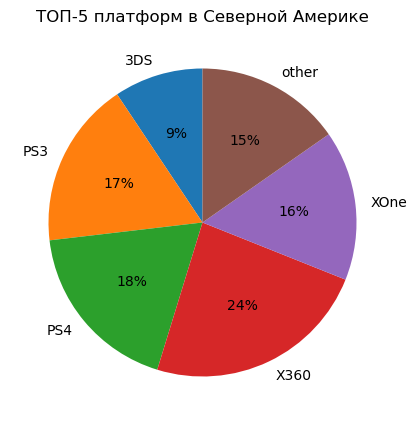

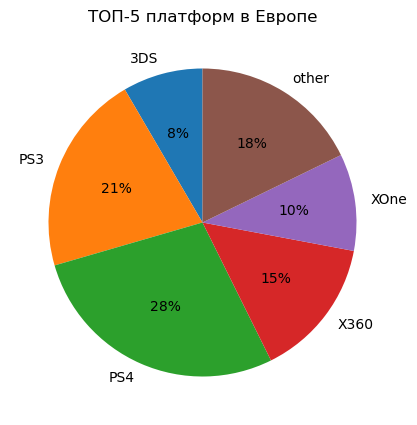

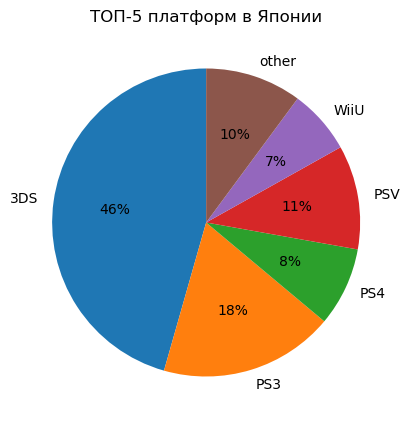

In [50]:
top5_platforms_na['na_sales'].plot.pie(labels = top5_platforms_na['platform'], 
                                       autopct='%.0f%%', 
                                       subplots=True, 
                                       figsize=(5,5),startangle=90)
plt.ylabel('')
plt.title('ТОП-5 платформ в Северной Америке')
plt.show()

top5_platforms_eu['eu_sales'].plot.pie(labels = top5_platforms_eu['platform'], 
                                       autopct='%.0f%%', 
                                       subplots=True, 
                                       figsize=(5,5),startangle=90)
plt.ylabel('')
plt.title('ТОП-5 платформ в Европе')
plt.show()

top5_platforms_jp['jp_sales'].plot.pie(labels = top5_platforms_jp['platform'], 
                                       autopct='%.0f%%', 
                                       subplots=True, 
                                       figsize=(5,5),startangle=90)
plt.ylabel('')
plt.title('ТОП-5 платформ в Японии')
plt.show()

**В Америке и Европе пользуются в основном одними платформами: *X360, PS4, PS3, XOne, 3DS*. В Японии немного другая картина, в этой стране лидирует платформа *3DS*, когда в Америке и Европе она стоит на 5 месте. Также в Японии пользуются платформами *PS3, PS4* и другими: *PSV, WiiU*.**

## 4.2 Топ-5 самых популярных жанров <a class="anchor" id="regions_genres"></a>

### 4.2.1 Северная Америка <a class="anchor" id="na_genres"></a>

In [51]:
top5_genres_na = data2012 \
        .groupby('genre')['na_sales'].sum() \
        .sort_values(ascending=False).reset_index()
top5_genres_na.head()

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


In [52]:
# объединяем жанры не из ТОП-5
top5_genres_na.loc[(top5_genres_na['genre'] != 'Action') \
                                                   & (top5_genres_na['genre'] != 'Sports') \
                                                   & (top5_genres_na['genre'] != 'Shooter') \
                                                   & (top5_genres_na['genre'] != 'Role-Playing') \
                                                   & (top5_genres_na['genre'] != 'Misc'), 'genre'] = 'other'
top5_genres_na = top5_genres_na.reset_index().groupby('genre')['na_sales'].sum().reset_index()
top5_genres_na

,genre,na_sales
0,Action,177.84
1,Misc,38.19
2,Role-Playing,64.00
3,Shooter,144.77
4,Sports,81.53
5,other,84.64


### 4.2.2 Европа <a class="anchor" id="eu_genres"></a>

In [53]:
top5_genres_eu = data2012 \
        .groupby('genre')['eu_sales'].sum() \
        .sort_values(ascending=False).reset_index()
top5_genres_eu.head()

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


In [54]:
# объединяем жанры не из ТОП-5
top5_genres_eu.loc[(top5_genres_eu['genre'] != 'Action') \
                                                   & (top5_genres_eu['genre'] != 'Sports') \
                                                   & (top5_genres_eu['genre'] != 'Shooter') \
                                                   & (top5_genres_eu['genre'] != 'Role-Playing') \
                                                   & (top5_genres_eu['genre'] != 'Racing'), 'genre'] = 'other'
top5_genres_eu = top5_genres_eu.reset_index().groupby('genre')['eu_sales'].sum().reset_index()
top5_genres_eu

,genre,eu_sales
0,Action,159.34
1,Racing,27.29
2,Role-Playing,48.53
3,Shooter,113.47
4,Sports,69.09
5,other,89.10


### 4.2.3 Япония <a class="anchor" id="jp_genres"></a>

In [55]:
top5_genres_jp = data2012 \
        .groupby('genre')['jp_sales'].sum() \
        .sort_values(ascending=False).reset_index()
top5_genres_jp.head()

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


In [56]:
# объединяем жанры не из ТОП-5
top5_genres_jp.loc[(top5_genres_jp['genre'] != 'Role-Playing') \
                                                   & (top5_genres_jp['genre'] != 'Action') \
                                                   & (top5_genres_jp['genre'] != 'Simulation') \
                                                   & (top5_genres_jp['genre'] != 'Fighting') \
                                                   & (top5_genres_jp['genre'] != 'Misc'), 'genre'] = 'other'
top5_genres_jp = top5_genres_jp.reset_index().groupby('genre')['jp_sales'].sum().reset_index()
top5_genres_jp

,genre,jp_sales
0,Action,52.80
1,Fighting,9.44
2,Misc,12.86
3,Role-Playing,65.44
4,Simulation,10.41
5,other,41.63


### 4.2.4 Сравнение регионов по жанрам <a class="anchor" id="all_genres"></a>

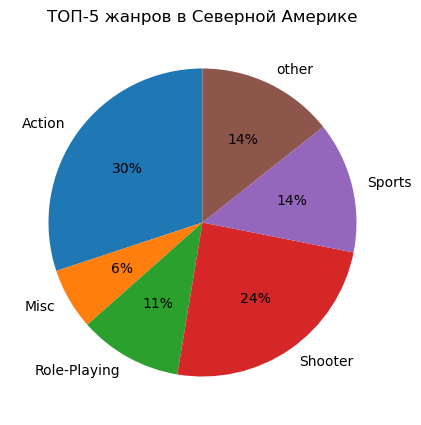

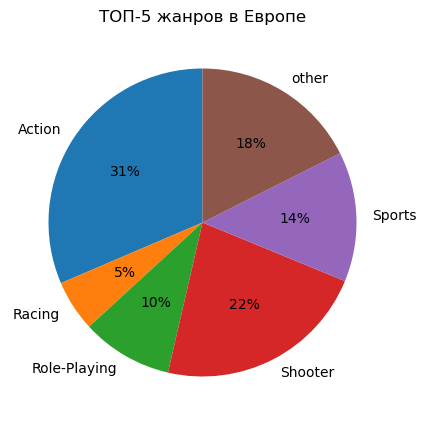

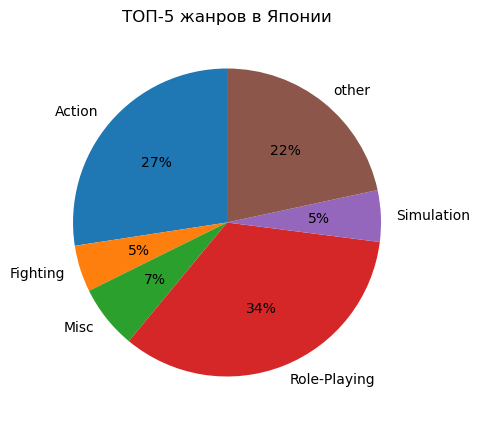

In [57]:
top5_genres_na['na_sales'].plot.pie(labels = top5_genres_na['genre'], 
                                    autopct='%.0f%%', 
                                    subplots=True, 
                                    figsize=(5,5),startangle=90)
plt.ylabel('')
plt.title('ТОП-5 жанров в Северной Америке')
plt.show()

top5_genres_eu['eu_sales'].plot.pie(labels = top5_genres_eu['genre'], 
                                    autopct='%.0f%%', 
                                    subplots=True, 
                                    figsize=(5,5),startangle=90)
plt.ylabel('')
plt.title('ТОП-5 жанров в Европе')
plt.show()

top5_genres_jp['jp_sales'].plot.pie(labels = top5_genres_jp['genre'], 
                                    autopct='%.0f%%', 
                                    subplots=True, 
                                    figsize=(5,5),startangle=90)
plt.ylabel('')
plt.title('ТОП-5 жанров в Японии')
plt.show()

**В Америке и Европе совпадают топ-4 жанра *Action, Shooter, Sports, Role-Playing*; 5-ый жанр в Америке: *Misc*, в Европе: *Racing*. В Японии лидирует жанр *Role-Playing*, так же популярны *Action* и *Misc*, новые жанры *Simulation, Fighting*.**

## 4.3 Влияние рейтинга ESRB  <a class="anchor" id="ESRB"></a>

In [58]:
esrb_regions = data2012.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()\
    .sort_values(by = 'na_sales', ascending=False).reset_index()
esrb_regions

,rating,na_sales,eu_sales,jp_sales
0,M,231.57,193.96,21.20
1,E,114.37,113.03,28.33
2,no_ESRP,103.31,91.50,108.84
3,E10+,75.70,55.37,8.19
4,T,66.02,52.96,26.02


**Существует 4 основных рейтинга: M, E, E10+, T. Влияние рейтинга на продажи одинаково в Америке и в Европе. В Японии продают много игр без рейтинга, так как рейтинг ESRP предназначен для Америки и Канады, для Японии он необязателен. Если смотреть на рейтинг игр, которые выпустились в США и попали на продажу в Японии, то сначала по популярности идут игры с рейтингом: E, T, M, E10+.**

# 5. Проверка гипотез <a class="anchor" id="hypotheses"></a>

## 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <a class="anchor" id="hypotheses1"></a>

Так как нам не нужны сверх точные значения, то критический уровень статистической значимости 5% alpha = 0.05

Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [59]:
# создадим списки
xbox = data2012.query('platform == "XOne"')['user_score'].dropna().to_list()
pc = data2012.query('platform == "PC"')['user_score'].dropna().to_list()

In [60]:
# дисперсия
print('Дисперсия XOne =', np.var(xbox))
print('Дисперсия PC =', np.var(pc))

Дисперсия XOne = 1.8965188383045526
Дисперсия PC = 2.7569952398906588


Дисперсии отличаются, поэтому возьмем equal_var=False.

Для тестирования гипотез используем двусторонний t-тест Стьюдента.

In [61]:
alpha = 0.05

results = st.ttest_ind(xbox, pc, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


In [62]:
#посмотрим среднее у обеих платформ, чтобы подтвердить нашу гипотезы

xbox_mean = data2012.query('platform == "XOne"')['user_score'].mean().round(2)
pc_mean = data2012.query('platform == "PC"')['user_score'].mean().round(2)

print(f'Средний пользовательский рейтинг Xbox One: {xbox_mean}, средний пользовательский рейтинг Xbox One: {pc_mean}.')

Средний пользовательский рейтинг Xbox One: 6.52, средний пользовательский рейтинг Xbox One: 6.43.


**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

## 5.2 Средние пользовательские рейтинги жанров Action и Sports одинаковые <a class="anchor" id="hypotheses2"></a>

Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [63]:
# создадим списки
action = data2012.query('genre == "Action"')['user_score'].dropna().to_list()
sports = data2012.query('genre == "Sports"')['user_score'].dropna().to_list()

In [64]:
# дисперсия
print('Дисперсия Action =', np.var(action))
print('Дисперсия Sports =', np.var(sports))

Дисперсия Action = 1.8854720340439224
Дисперсия Sports = 3.0073882971729127


Дисперсии отличаются сильно, поэтому возьмем equal_var=False

In [65]:
alpha = 0.05

results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


In [66]:
#посмотрим среднее у обоих жанров, чтобы подтвердить противоречивость нашей гипотезы

xbox_mean = data2012.query('genre == "Action"')['user_score'].mean().round(2)
pc_mean = data2012.query('genre == "Sports"')['user_score'].mean().round(2)

print(f'Средний пользовательский рейтинг жанра Action: {xbox_mean}, средний пользовательский рейтинг жанра Sports: {pc_mean}.')

Средний пользовательский рейтинг жанра Action: 6.83, средний пользовательский рейтинг жанра Sports: 5.46.


**На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.**

# 6 Выводы  <a class="anchor" id="conclusion"></a>

**В ходе предобработки информации:**
1. Удалили строки с пропусками в *name, genre, year_of_release*, так как их заменить не получилось, и их незначительное количество на общий анализ не повлияют.
2. Обработали пропуски в *rating*. Пропуски заменили на "no_ESRP", и "E" объединить с "K-A".
3. Дупликаты не выявлены.
    
**В ходе анализа:**
1. До 1992 выпускалось мало игр. С 1992 по 2005 идет постепенное увеличение выпусков игр. Период с 2005 по 2011 является лучшим по выпуску игр. С 2011 наблюдается спад.
2. Среднее время жизни платформы: 7.16.
3. Самые популярные платформы с 2012 года (актуальный период): PS4, PS3, X360, 3DS, XOne, WiiU, PC.
4. Отзывы критиков и продажи имеют прямо пропорциональную зависимость (средняя зависимость). Однако зависимость между отзывами пользователей и продажами слабая, иногда и обратно пропорциональная. Следовательно, пользователи в основном не влияют на продажи.
5. С большим отрывом выпускались игры с жанром Action. Далее Shooter, Role-Playing, Sports. Наименее продаваемые игры с жанром Puzzle. Наибольшую прибыль с точки зрения стабильности приносят платформы: Sports, Platform. И несмотря на высокий разброс значений у жанра Shooter, этот жанр так же приносит стабильный доход.

**Портрет пользователя каждого региона**
1. В Америке и Европе пользуются в основном одними платформами: X360, PS4, PS3, XOne, 3DS. В Японии немного другая картина, в этой стране лидирует платформа 3DS, когда в Америке и Европе она стоит на 5 месте. Также в Японии пользуются платформами PS3, PS4 и другими: PSV, WiiU.
2. В Америке и Европе совпадают топ-4 жанра Action, Shooter, Sports, Role-Playing; 5-ый жанр в Америке: Misc, в Европе: Racing. В Японии лидирует жанр Role-Playing, так же популярны Action и Misc, новые жанры Simulation, Fighting.
3. Существует 4 основных рейтинга: M, E, E10+, T. Влияние рейтинга на продажи одинаково в Америке и в Европе. В Японии продают много игр без рейтинга, так как рейтинг ESRP предназначен для Америки и Канады, для Японии он необязателен. Если смотреть на рейтинг игр, которые выпустились в США и попали на продажу в Японии, то сначала по популярности идут игры с рейтингом: E, T, M, E10+.

**По гипотезам**
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.


**Рекомендации**
- Для Северной Америки и Европы рекламный бюджет следует акцентировать на платформу PS4 и жанры Action и Shooter.
- В Японии следует рекламировать жанры Role-Playing и Action на платформе 3DS.
- На рейтинг ESRP стоит обращать внимание только в Северной Америке и в Европе, там пользуются спросом игры рейтинга M (для взрослых).
- Следует следить за отзывами критиков, так как они влияют на продажи.